In [139]:
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')

In [140]:
data=pd.read_csv(r"C:\Users\arunb\Downloads\Compressed\Analytic in Sales Project-20240702T043020Z-001\Analytic in Sales Project\Supermarket_sales_prediction.csv")
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## EDA for BigMart sales Data

In [141]:
data.shape

(8523, 12)

In [142]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [143]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [145]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [146]:
#checking the null values
(data.isnull().sum()/data.shape[0]*100)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [147]:
data.duplicated().sum()

0

## chect for outliers

## further EDA
## univariate analysis

check thge distribution of the variables

1.get the products related info in terms of quantity

2.weight

3.price

4.outlet

5.location type

6.outlet info

7.individual variables

### Normalization check _ skewness check

# Multivariate Analysis

1.item vs price

2.item visibility vs price

3.weight vs prices

4.fat content vs price

5.outlet(location, franchise) vs prices

6.Establishment Year is affecting the price

7.How the item visibility and which item type) vs price

8.item type vs fat content

9.outlet vs item type

## corelation check -Linearity check

## multicollinearity

### Univariate

In [148]:
#numerical columns replaced with mean
data['Item_Weight'].mean()

12.857645184135976

In [149]:
# categorical columns replaced with mode
data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [150]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

In [151]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [152]:
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x:x.mode()))

In [153]:
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [154]:
missing_values_loc = data['Outlet_Size'].isnull()

In [155]:
missing_values_loc

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [156]:
data.loc[missing_values_loc,'Outlet_Size'] = data.loc[missing_values_loc,'Outlet_Type' ].apply(lambda x:outlet_size_mode[x])

In [157]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [158]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [159]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### Drawing Distribution (For Numeric Fields) and CountPlots(For Categorical Cols)

### 1.Weight

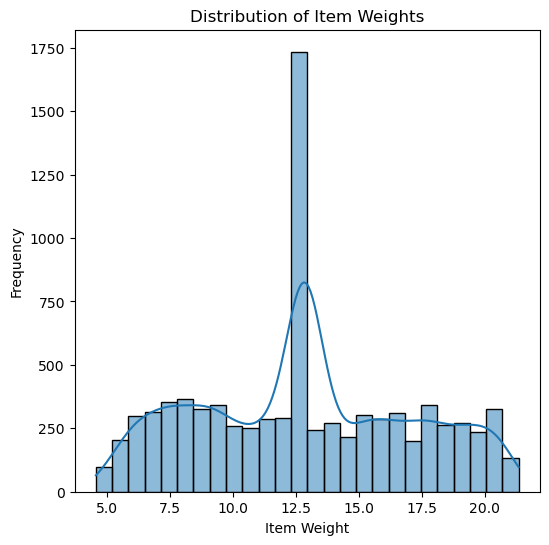

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plotting distribution of 'Item_Weight'
plt.figure(figsize=(6, 6))
sns.histplot(data['Item_Weight'], kde=True)
plt.title('Distribution of Item Weights')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.show()

### 2.Item mrp

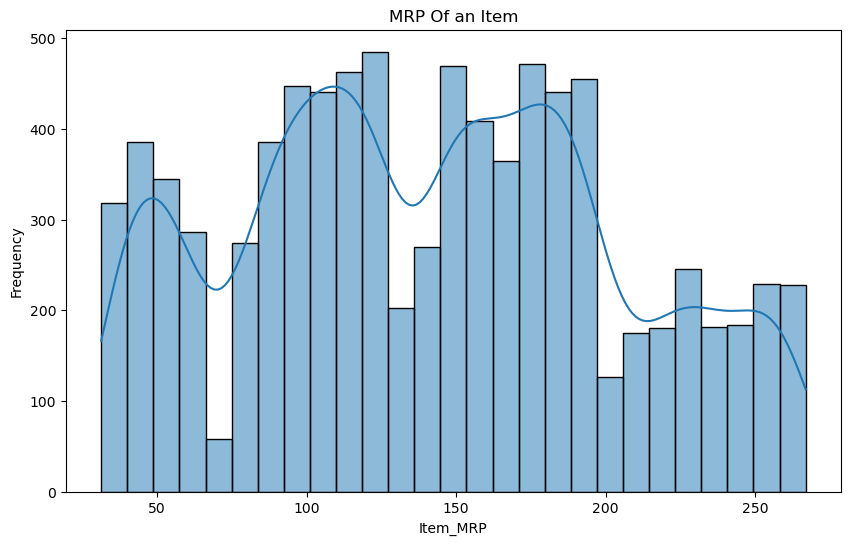

In [225]:
#Data Distribution for Item_MRP Col
plt.figure(figsize=(10,6))
sns.histplot(data['Item_MRP'],kde=True)
plt.title('MRP Of an Item')
plt.xlabel('Item_MRP')
plt.ylabel('Frequency')
plt.show()

### 3.Outlet_Identifier

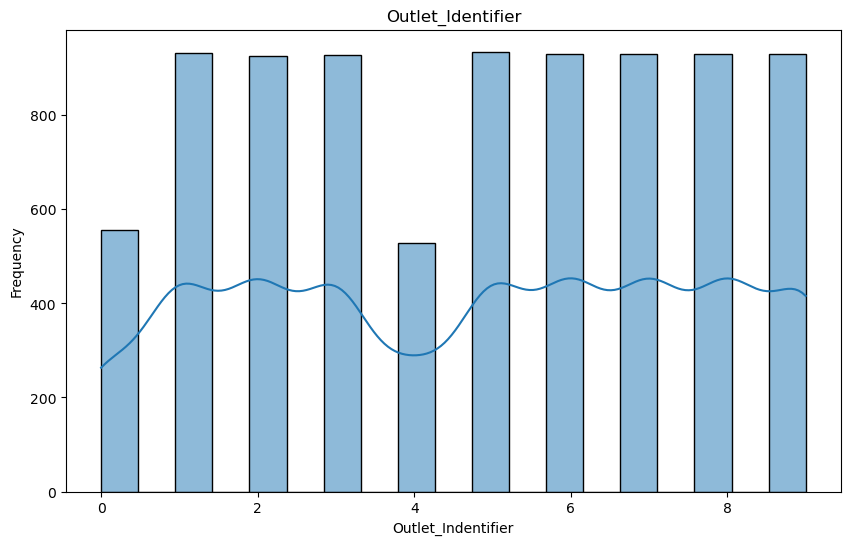

In [228]:
plt.figure(figsize=(10,6))
sns.histplot(data['Outlet_Identifier'] , kde=True)
plt.title('Outlet_Identifier')
plt.xlabel('Outlet_Indentifier')
plt.ylabel('Frequency')
plt.show()

### 4.Location type

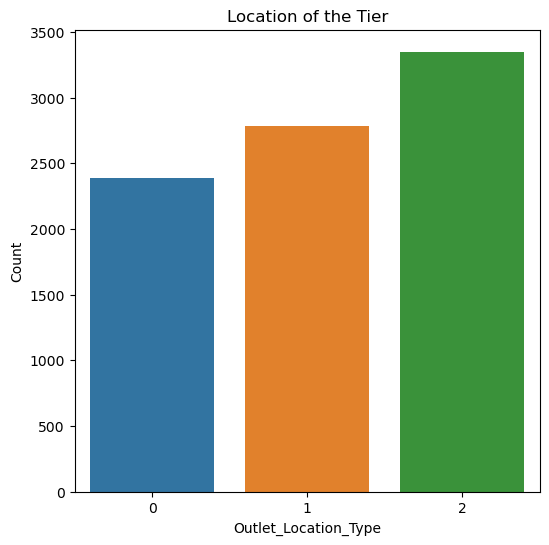

In [229]:
plt.figure(figsize=(6,6))
sns.countplot(x = data['Outlet_Location_Type'], data=data)
plt.title('Location of the Tier')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Count')
plt.show()

### 5.Outlet type

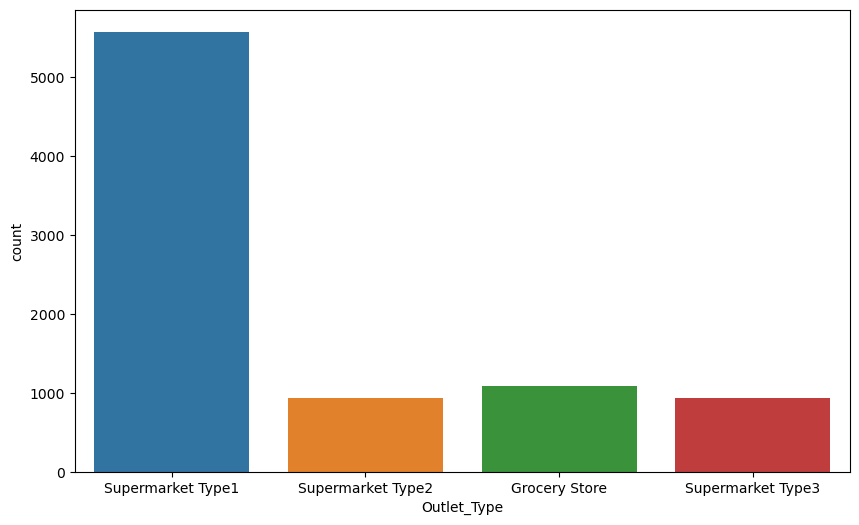

In [164]:
plt.figure(figsize=(10,6))
sns.countplot(x = data['Outlet_Type'], data=data)
plt.show()

### 6.Individual Variables

<Figure size 600x600 with 0 Axes>

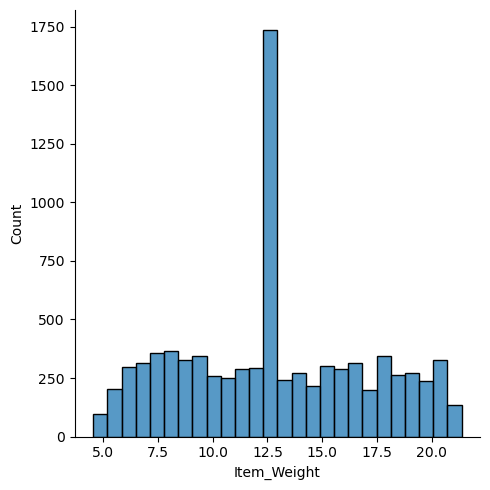

<Figure size 600x600 with 0 Axes>

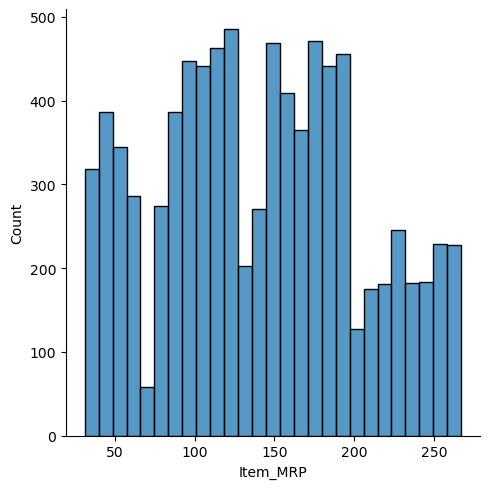

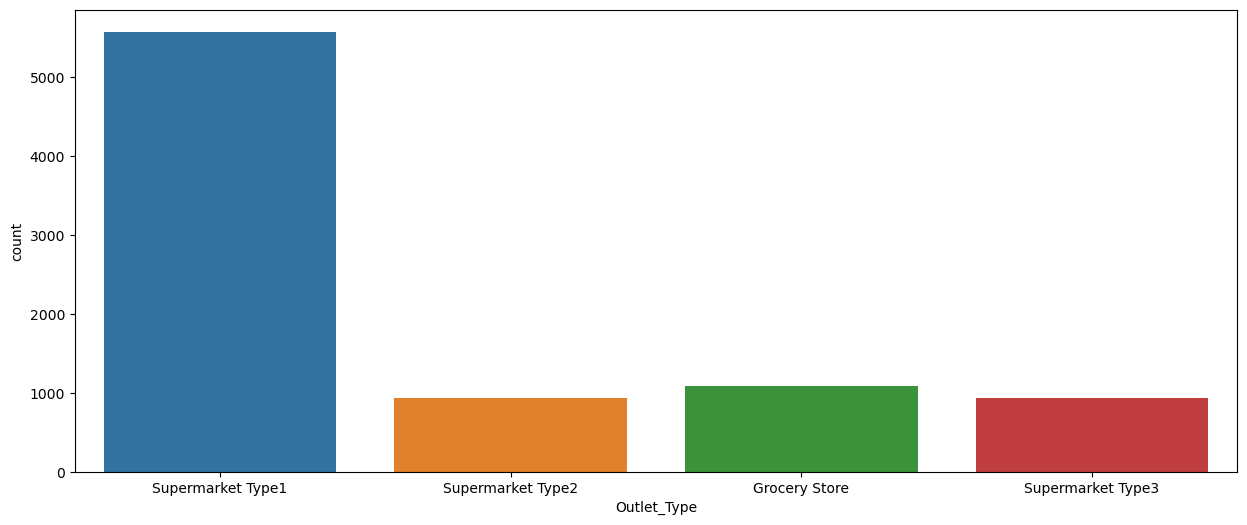

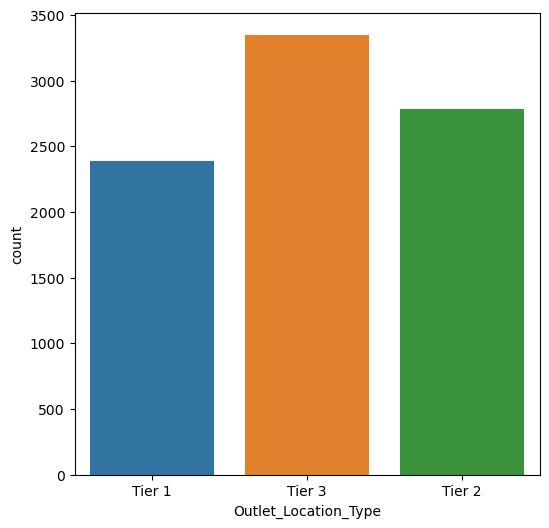

In [165]:

# 1. Item Weight

plt.figure(figsize=(6,6))
sns.displot(data['Item_Weight'])
plt.show()

# 2. Price

plt.figure(figsize=(6,6))
sns.displot(data['Item_MRP'])
plt.show()

# 3. Outlet Type: Count plot
plt.figure(figsize=(15,6))
sns.countplot(x = data['Outlet_Type'], data=data)
plt.show()

# 4. Outlet Location Type: Count plot
plt.figure(figsize=(6,6))
sns.countplot(x = data['Outlet_Location_Type'], data=data)
plt.show()

### item visibility vs price

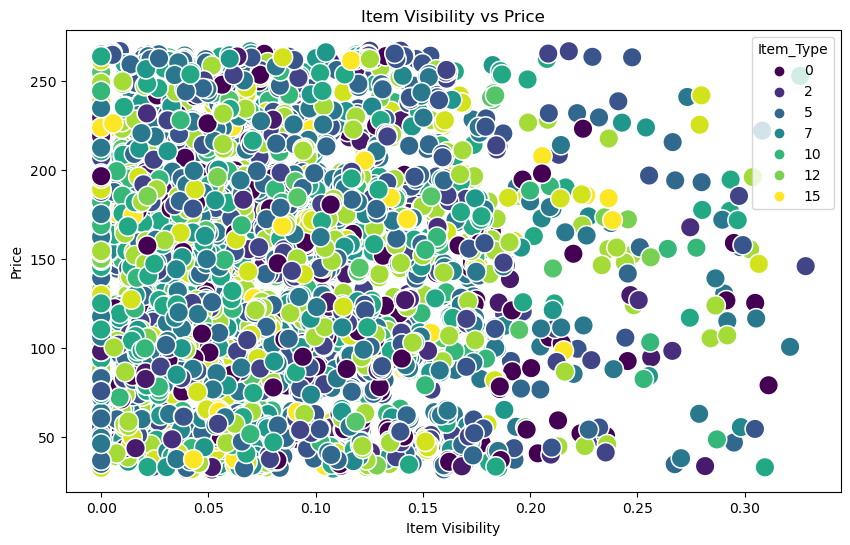

In [238]:
# Example scatterplot (replace with your actual data)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Visibility', y='Item_MRP', data=data, hue='Item_Type', palette='viridis' ,s=200)
plt.title('Item Visibility vs Price')
plt.xlabel('Item Visibility')
plt.ylabel('Price')
plt.show()

In [176]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


In [177]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### 3.weight vs prices

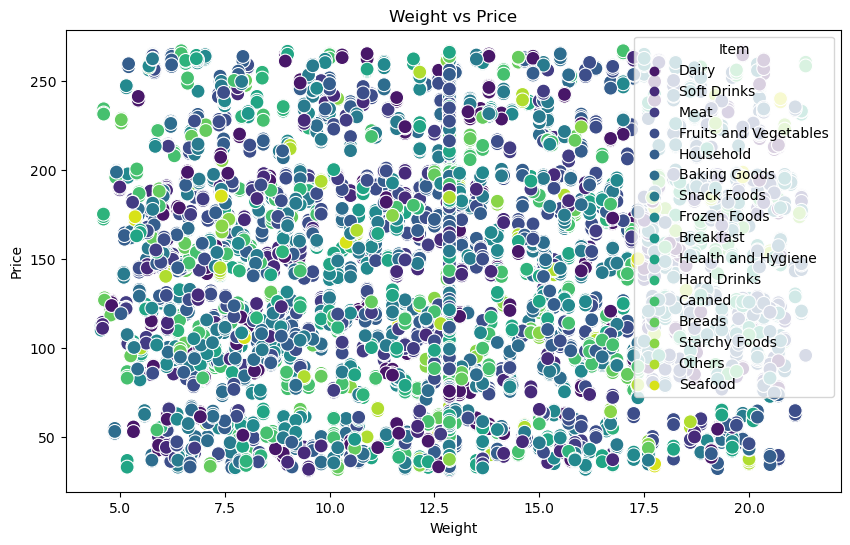

In [180]:
# Scatter plot of weight vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Weight', y='Item_MRP', data=data, hue='Item_Type', palette='viridis', s=100)
plt.title('Weight vs Price')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.legend(title='Item')
plt.show()

### 4.fat content vs price

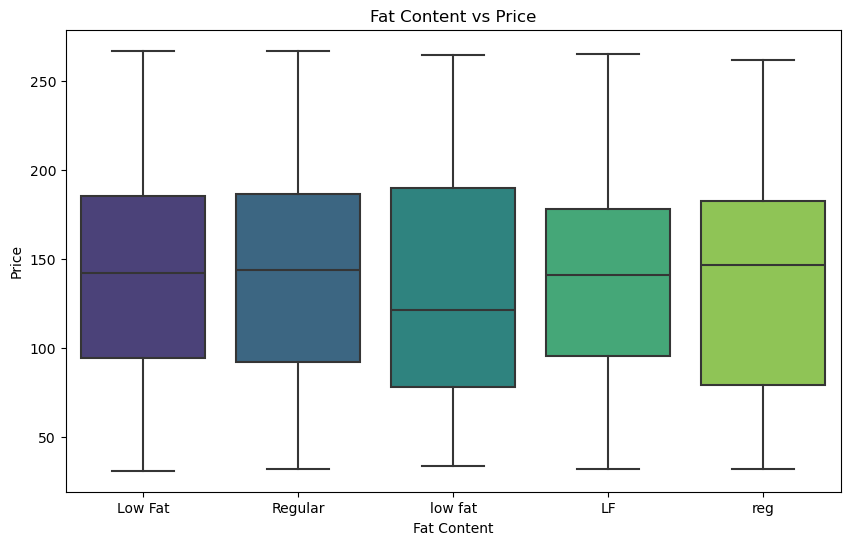

In [182]:
# Box plot of fat content vs price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item_Fat_Content', y='Item_MRP', data=data, palette='viridis')
plt.title('Fat Content vs Price')
plt.xlabel('Fat Content')
plt.ylabel('Price')
plt.show()

### 5.outlet(location, franchise) vs prices

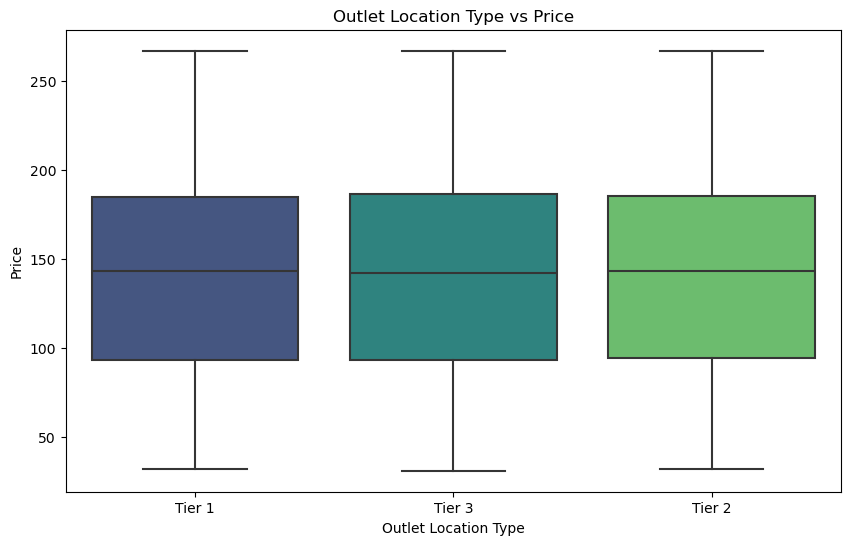

In [183]:
# Box plot of outlet location type vs price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Location_Type', y='Item_MRP', data=data, palette='viridis')
plt.title('Outlet Location Type vs Price')
plt.xlabel('Outlet Location Type')
plt.ylabel('Price')
plt.show()

### 6.Establishment Year is affecting the price

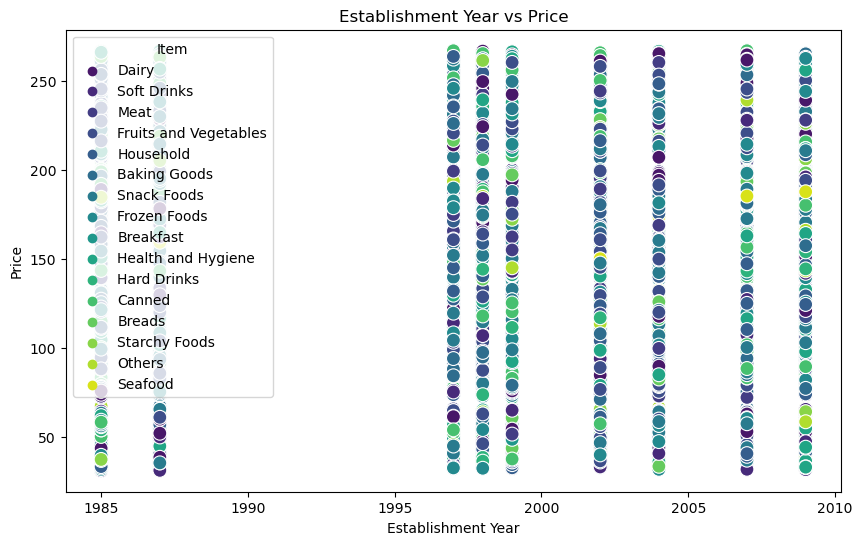

In [186]:
# Scatter plot of establishment year vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Outlet_Establishment_Year', y='Item_MRP', data=data, hue='Item_Type', palette='viridis', s=100)
plt.title('Establishment Year vs Price')
plt.xlabel('Establishment Year')
plt.ylabel('Price')
plt.legend(title='Item')
plt.show()

### 7.How the item visibility and which item type) vs price

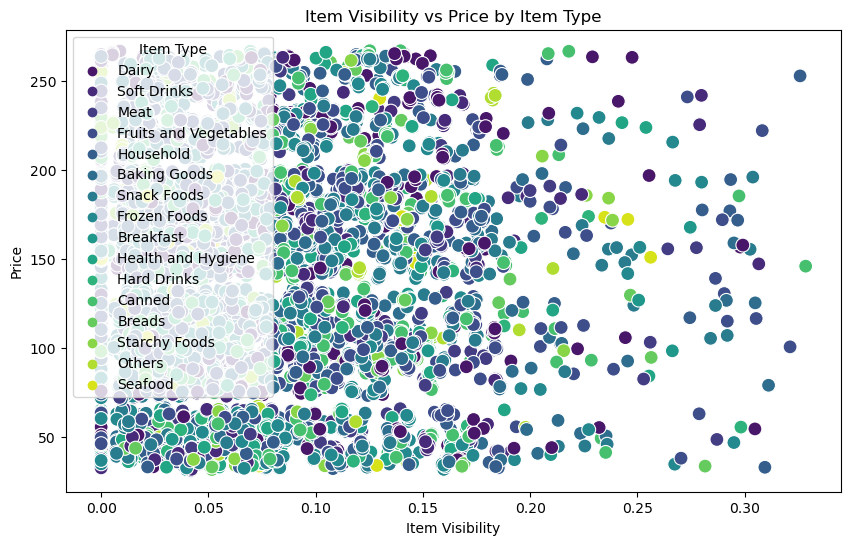

In [187]:
# Scatter plot of item visibility vs price colored by item type
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Visibility', y='Item_MRP', hue='Item_Type', data=data, palette='viridis', s=100)
plt.title('Item Visibility vs Price by Item Type')
plt.xlabel('Item Visibility')
plt.ylabel('Price')
plt.legend(title='Item Type', loc='upper left')
plt.show()

### 8.item type vs fat content

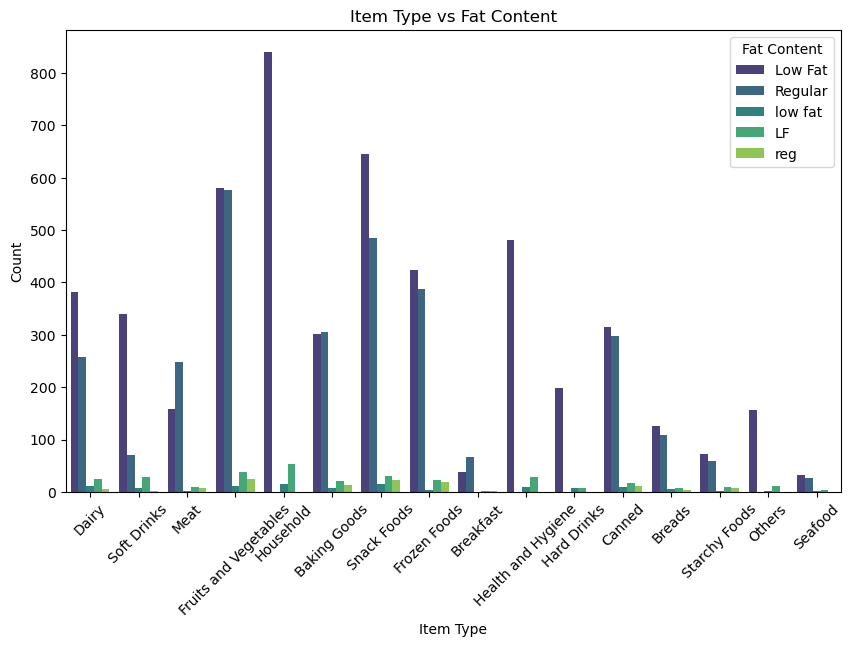

In [189]:
# Count plot of item type vs fat content
plt.figure(figsize=(10, 6))
sns.countplot(x='Item_Type', hue='Item_Fat_Content', data=data, palette='viridis')
plt.title('Item Type vs Fat Content')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fat Content', loc='upper right')
plt.show()

### 9.outlet vs item type

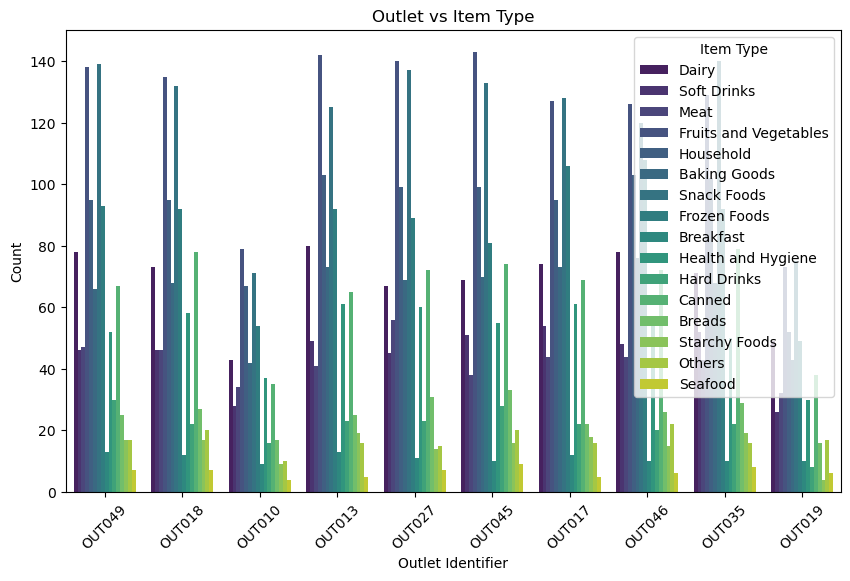

In [190]:
# Count plot of outlet vs item type
plt.figure(figsize=(10, 6))
sns.countplot(x='Outlet_Identifier', hue='Item_Type', data=data, palette='viridis')
plt.title('Outlet vs Item Type')
plt.xlabel('Outlet Identifier')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Item Type', loc='upper right')
plt.show()

In [192]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [193]:
data.replace({'Item_Fat_Content':{'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [194]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [195]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


In [196]:
from sklearn.preprocessing import LabelEncoder

In [197]:
encoder = LabelEncoder()

In [198]:
data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])

data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])

data['Item_Type'] = encoder.fit_transform(data['Item_Type'])

data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])

data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])

data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])

data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])

In [199]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
0    5517
1    3006
Name: count, dtype: int64

In [200]:
x = data.drop(columns='Item_Outlet_Sales')
y = data['Item_Outlet_Sales']

In [201]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [202]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [205]:
print(x.shape, x_train.shape, x_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [206]:
print(y.shape, y_train.shape, y_test.shape)

(8523,) (6818,) (1705,)


### Model Creation

In [215]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 435.7 kB/s eta 0:04:47
   ---------------------------------------- 0.1/124.9 MB 544.7 kB/s eta 0:03:50
   ---------------------------------------- 0.2/124.9 MB 1.2 MB/s eta 0:01:48
   ---------------------------------------- 0.3/124.9 MB 1.6 MB/s eta 0:01:20
   ---------------------------------------- 0.6/124.9 MB 2.6 MB/s eta 0:00:49
   ---------------------------------------- 1.4/124.9 MB 4.7 MB/s eta 0:00:27
    --------------------------------------- 2.4/124.9 MB 7.0 MB/s eta 0:00:18
   - -------------------------------------- 3.3/124.9 MB 8.5 MB/s eta 0:00:15
   - -------------------------------------- 5.2/124.9 MB 12.2 MB/s eta 0:00:10
   -- ------------------------------------- 6.6/124.9 MB 13.5 MB/s eta 0:00:09
   -- ------------------------------------- 7.1/124.9 MB 13.8 MB/s eta 0

In [216]:
from xgboost import XGBRegressor

In [217]:
model = XGBRegressor()

In [239]:
#training our model

model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [219]:
from sklearn.metrics import r2_score

predictions_train = model.predict(x_train)
r2_score(predictions_train, y_train)

0.832406512929033

In [220]:
predictions_test = model.predict(x_test)
r2_score(predictions_test, y_test)

0.3258608690055782